In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.shape

(158, 12)

In [52]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [54]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [55]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


SUMMARY STATISTICS

In [56]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [57]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [58]:
df.sort_values(by="Happiness Rank", ascending=True).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [59]:
df.sort_values(by="Happiness Rank", ascending=False).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [70]:
column=['Region','Standard Error','Country']
new_dropped=df.drop(column,axis=1)

In [71]:
new_dropped

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [72]:
new_dropped.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [73]:
# finding missing data

new_dropped.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [17]:
df_region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


In [18]:
df_region['Happiness Score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253


In [19]:
#SO HERE WE ARE FINDING WHICH REGION REGION HAS HAPPINESS SCORE GREATER THAN 6 
df_EA = df[df['Region'] == 'Eastern Asia']
df_WE = df[df['Region'] == 'Western Europe']
df_EE = df[df['Region'] == 'Eastern Europe']
df_LA = df[df['Region'] == 'Latin America']
df_AP = df[df['Region'] == 'Asia-Pacific']
df_NA = df[df['Region'] == 'North America']

In [20]:
len(df_WE[df_WE['Happiness Score'] > 6])

16

In [21]:
len(df_NA[df_NA['Happiness Score'] > 6])

2

In [22]:
len(df_EE[df_EE['Happiness Score'] > 6])

0

In [23]:
len(df_AP[df_AP['Happiness Score'] > 6])

0

In [24]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(df_WE[df_WE['Happiness Score'] > 6])))

There are 16 countries in Western Europe that have a happiness score above 6.0 


In [25]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(df_NA[df_NA['Happiness Score'] > 6])))

There are 2 countries in Western Europe that have a happiness score above 6.0 


In [26]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(df_EE[df_EE['Happiness Score'] > 6])))

There are 0 countries in Western Europe that have a happiness score above 6.0 


In [27]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(df_AP[df_AP['Happiness Score'] > 6])))

There are 0 countries in Western Europe that have a happiness score above 6.0 


In [28]:
score_WE = df_WE.max(axis=0)['Happiness Score'] - df_WE.min(axis=0)['Happiness Score']
print(score_WE)

2.7300000000000004


In [29]:
score_NA = df_NA.max(axis=0)['Happiness Score'] - df_NA.min(axis=0)['Happiness Score']
print(score_NA)

0.3080000000000007


In [30]:
score_LA = df_LA.max(axis=0)['Happiness Score'] - df_LA.min(axis=0)['Happiness Score']
print(score_LA)

nan


In [31]:
score_AP = df_AP.max(axis=0)['Happiness Score'] - df_AP.min(axis=0)['Happiness Score']
print(score_AP)

nan


In [32]:
score = {}

In [33]:
score['Western Europe'] = score_WE
score['Latin America']  = score_LA
score['Asia-Pacific']   = score_AP
score['North America']  = score_NA

In [34]:
print("The {} region seems to have the largest range of happiness scores".format(max(score, key=score.get)))

The Western Europe region seems to have the largest range of happiness scores


<AxesSubplot:>

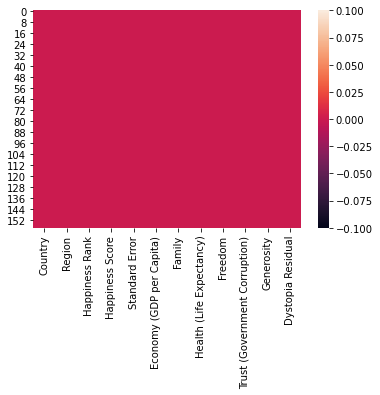

In [35]:
sns.heatmap(df.isnull())

Scatter plots

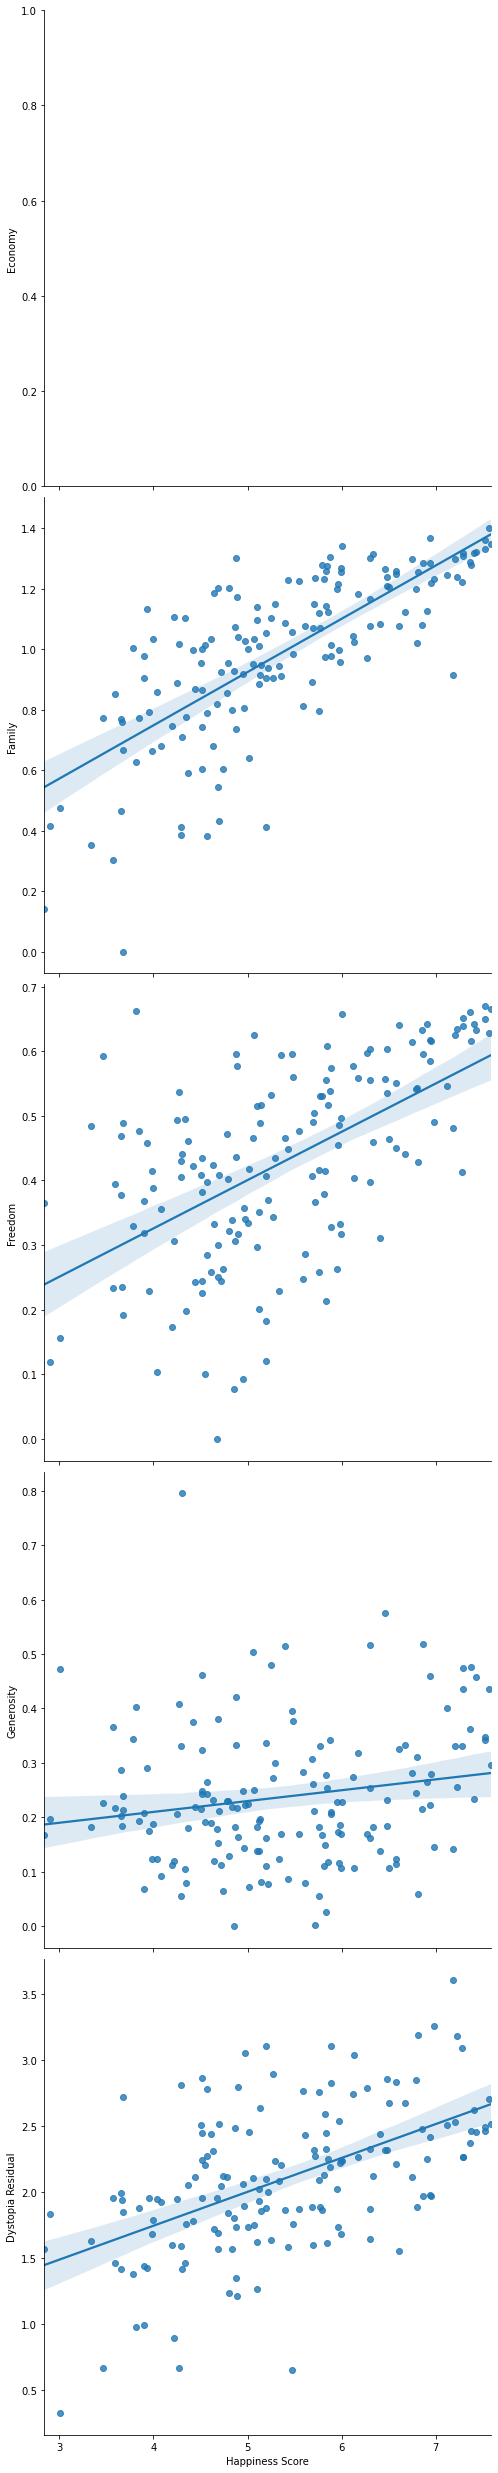

In [36]:
sns.pairplot(data=df, kind='reg', size = 7,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy', 'Family', 'Freedom', 'Generosity','Dystopia Residual'])

Correlation

Obtaining the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?



In [74]:
new_dropped.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)



Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [75]:
new_dropped.corr(method="pearson", min_periods=20)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [79]:
new_dropped_cor=new_dropped.corr()
new_dropped_cor

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

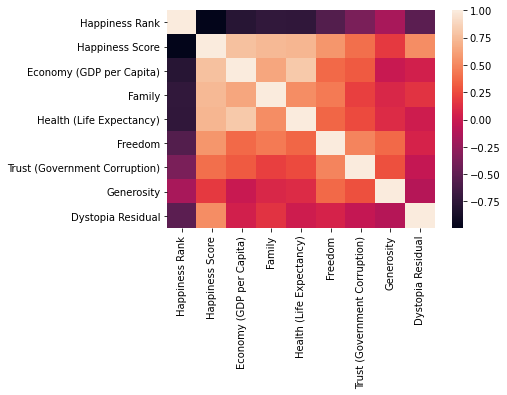

In [80]:
sns.heatmap(new_dropped_cor)

<AxesSubplot:>

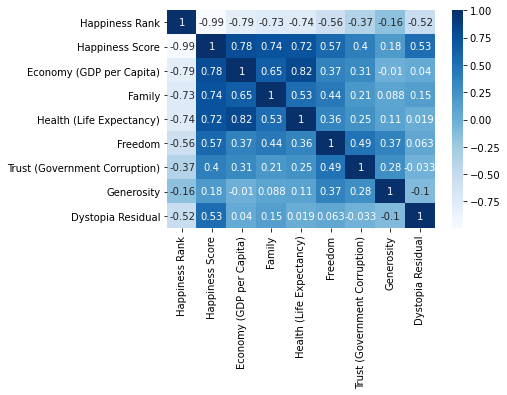

In [81]:
plt.figure(figsize=(6,4))
sns.heatmap(new_dropped_cor,cmap='Blues',annot=True)

In [82]:
new_dropped.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:>

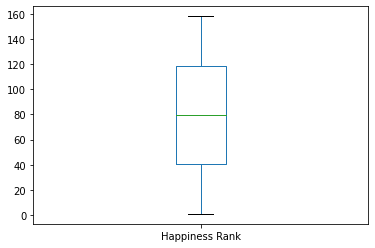

In [83]:
new_dropped['Happiness Rank'].plot.box()

<AxesSubplot:>

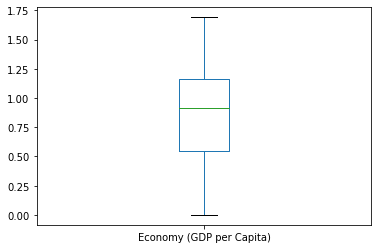

In [84]:
new_dropped['Economy (GDP per Capita)'].plot.box()

<AxesSubplot:>

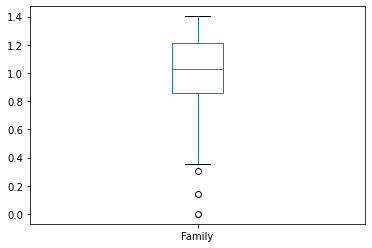

In [86]:
new_dropped['Family'].plot.box()

Happiness Rank                      AxesSubplot(0.125,0.536818;0.133621x0.343182)
Happiness Score                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Economy (GDP per Capita)          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Family                           AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Health (Life Expectancy)         AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.133621x0.343182)
Trust (Government Corruption)       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Generosity                           AxesSubplot(0.44569,0.125;0.133621x0.343182)
Dystopia Residual                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

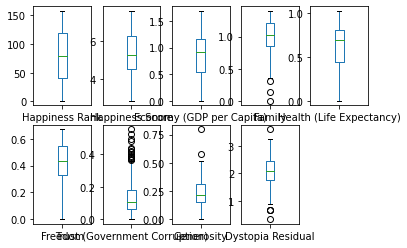

In [87]:
new_dropped.plot(kind='box',subplots=True,layout=(2,5))

In [48]:
import scipy
import scipy.stats as sp
import numpy as np
import warnings
warnings.filterwarnings("ignore")

scipy.__version__

'1.5.2'

In [88]:
new_dropped.dtypes

Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [89]:
new_dropped.shape

(158, 9)

In [90]:
x=new_dropped.iloc[:,0:-1]
x.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [91]:
y=new_dropped.iloc[:,-1]
y.head()

0    2.51738
1    2.70201
2    2.49204
3    2.46531
4    2.45176
Name: Dystopia Residual, dtype: float64

In [96]:
x

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
153,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [93]:
x.shape

(158, 8)

In [94]:
y.shape

(158,)

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=42)

In [98]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(125, 8)
(125,)
(33, 8)
(33,)


In [99]:
lm = LinearRegression()
lm

LinearRegression()

In [100]:
lm.fit(x_train, y_train)

LinearRegression()

In [101]:
lm.coef_

array([ 4.12764992e-06,  1.00012988e+00, -1.00008431e+00, -9.99933319e-01,
       -9.99872872e-01, -9.99785638e-01, -9.99997981e-01, -9.99899332e-01])

In [102]:
lm.intercept_

-0.001203036453801154

In [103]:
new_dropped.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [104]:
lm.score(x_train,y_train)

0.9999997528658604

In [106]:
# predicting the value
pred=lm.predict(x_test)
print("predicted result",pred)
print("actual result",y_test)

predicted result [1.41816944 1.6842146  1.59905138 1.83340268 2.11008402 2.83591721
 2.79877578 1.73797881 2.06397244 1.42789775 2.24704833 2.32375707
 3.2604082  1.86965573 2.84823402 2.67770842 2.50994527 1.69486245
 3.05125932 1.59856769 1.41717756 2.41446396 2.53338021 2.26646174
 2.32125887 1.8796311  3.1071041  1.95851459 2.05110053 1.85116096
 1.38103727 2.08477141 1.79316113]
actual result 128    1.41805
45     1.68435
134    1.59927
156    1.83302
90     2.11032
29     2.83600
96     2.79832
98     1.73799
95     2.06367
140    1.42766
19     2.24743
56     2.32407
15     3.26001
69     1.86984
24     2.84848
30     2.67782
122    2.51009
109    1.69440
93     3.05137
65     1.59888
150    1.41723
18     2.41484
12     2.53320
9      2.26646
31     2.32142
81     1.87996
51     3.10712
139    1.95812
125    2.05125
146    1.85100
145    1.38079
75     2.08528
137    1.79293
Name: Dystopia Residual, dtype: float64


In [107]:
print("error")

print('Mean absolute error:',mean_absolute_error(y_test,pred))

print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 0.00023197621474781117
Mean squared error: 7.23362306014287e-08
Root mean squared error 0.00026895395628513945


In [108]:
# r2 score -> coefficient of determination
# is the proportion of variance in the dependant variable that is predictable from the independant variable(s)
#i.e change coming in y whenever x is being changed

In [109]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.999999733602386


In [110]:
new_dropped=pd.DataFrame(pred)
df.to_csv('happinessreport_submission.csv')